<center><h1>Melanoma Tumor Size Prediction</h1></center>
<center>
<h3>Deep Learning Foundation Project</h3>
<h4>Project Submitted By -</h4>
<h5>SUNIL KUMAR M</h5>
<h5>GCDAI - June 8th 2019 Batch</h5>
<h5>Email: sunilkumarm.182@gmail.com</h5>
</center>

## Table of Content

1. [Melanoma Tumor Size Detection Overview](#section1)<br>
2. [Melanoma Tumor Size Dataset](#section2)<br>
  - 2.1 [Get the Data](#section201)<br>
  - 2.2 [Data Description](#section202)<br>
  - 2.3 [Clean the Data](#section203)<br>
  - 2.4 [Split the Dataframe](#section204)<br>
  - 2.5 [Inspect the Data](#section205)<br>
  - 2.6 [Normalize the Data](#section206)<br>
3. [Model Development](#section3)<br>
  - 3.1 [Build the Model](#section301)<br>
  - 3.2 [Inspect the Model](#section302)<br>
  - 3.3 [Train the Model](#section303)<br>
  - 3.4 [Make Predictions](#section304)<br>
4. [Model Tuning](#section4)<br>
  - 4.1 [Increasing the Number of Hidden Layers](#section401)<br>
  - 4.2 [Weight Regularization](#section402)<br>
  - 4.3 [Dropout](#section403)<br>
  - 4.4 [Combined L2 + Dropout](#section404)<br>
  - 4.5 [Batch Normalization](#section405)<br>
5. [Conclusion](#section5)<br>

<a id=section1></a>
## 1. Melanoma Tumor Size Detection Overview



- Melanoma, also known as malignant melanoma, is a type of skin cancer that develops from the pigment-producing cells known as melanocytes.

    - The primary cause of melanoma is ultraviolet light (UV) exposure in those with low levels of the skin pigment melanin.
    - The UV light may be from the sun or other sources, such as tanning devices.

- Melanoma is the most dangerous type of skin cancer. Globally, in 2012, it newly occurred in 232,000 people.
    - In 2015, there were 3.1 million people with active disease, which resulted in 59,800 deaths.
    - Australia and New Zealand have the highest rates of melanoma in the world.
    - There are also high rates in Northern Europe and North America, while it is less common in Asia, Africa, and Latin America.
    - In the United States melanoma occurs about 1.6 times more often in men than women.

- Melanomas are present in many different shapes, sizes, and colors.
    - That’s why it’s tricky to provide a comprehensive set of warning signs.

In [1]:
# installing pyspark for data preprocessing
!pip install pyspark

     |████████████████████████████████| 204.2MB 59kB/s 
     |████████████████████████████████| 204kB 41.7MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=753ddcf2f83124b137478e6a30e5737804d182b21b6a8be3ca377c19b7acbc76
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [3]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id=section2></a>
## 2. Melanoma Tumor Size Dataset

<a id=section201></a>
### 2.1 Get the Data

- The dataset consists of various parameters containing information about the tumor.
    - The data is present in a single csv file:
    - [melanoma_tumor_size.csv](https://raw.githubusercontent.com/datasciencelearnofficial/Deep-Learning/master/Datasets/Melanoma_Tumor_Size_Prediction/melanoma_tumor_size.csv) - Dataset consisting of approximately 9,146 data samples.

In [4]:
# import the dataset
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("melanoma_prediction").getOrCreate()
df = spark.read.csv("sample_data/melanoma_tumor_size.csv", header = True, inferSchema = True)
df.show(5)

+---------+----------+-------------------+-----------+------------+------------------+----------+--------------+------------------+------------------+
|mass_npea|size_npear|       malign_ratio|damage_size|exposed_area|    std_dev_malign|err_malign|malign_penalty|      damage_ratio|        tumor_size|
+---------+----------+-------------------+-----------+------------+------------------+----------+--------------+------------------+------------------+
|   6930.9|   2919.02|0.42116000000000003|    51.8298|  988829.407|109.48700000000001|   2758.76|            72|39.361999999999995|            14.103|
|  15635.7|   4879.36|            0.31206|     223.55|2058426.3009|248.88099999999997|   5952.53|           240|           22.0253|             2.648|
|  10376.2|   2613.88|0.25190999999999997|    127.337|   1434676.1|           160.093|   4635.26|            73|           29.9963|1.6880000000000002|
|  13093.8|   4510.06|            0.34444|     155.44|1812195.1833|           173.015|   5273.

<a id=section202></a>
### 2.2 Data Description

 - Exploring the columns in the dataframe.

In [5]:
df.columns

['mass_npea',
 'size_npear',
 'malign_ratio',
 'damage_size',
 'exposed_area',
 'std_dev_malign',
 'err_malign',
 'malign_penalty',
 'damage_ratio',
 'tumor_size']

- Exploring the schema of the dataframe.

In [6]:
df.printSchema()

root
 |-- mass_npea: double (nullable = true)
 |-- size_npear: double (nullable = true)
 |-- malign_ratio: double (nullable = true)
 |-- damage_size: double (nullable = true)
 |-- exposed_area: double (nullable = true)
 |-- std_dev_malign: double (nullable = true)
 |-- err_malign: double (nullable = true)
 |-- malign_penalty: integer (nullable = true)
 |-- damage_ratio: double (nullable = true)
 |-- tumor_size: double (nullable = true)



- Exploring the statistical summary of the dataframe.

In [7]:
df.describe().show()

+-------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+
|summary|         mass_npea|        size_npear|       malign_ratio|       damage_size|      exposed_area|   std_dev_malign|        err_malign|   malign_penalty|     damage_ratio|        tumor_size|
+-------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+
|  count|              9146|              9146|               9146|              9146|              9146|             9146|              9146|             9146|             9146|              9146|
|   mean| 9903.052173627799|3032.8278373059193| 0.3030828755740224|103.90211786573322|1372441.9647981182|146.3042389350537|3992.9362562869096|69.84966105401269|34.46165192433863| 7.723348239667638|
| stddev|4

- mass_npea:  the mass of the area understudy for melanoma tumor
- size_npear: the size of the area understudy for melanoma tumor
- malign_ratio: ration of normal to malign surface understudy
- damage_size: unrecoverable area of skin damaged by the tumor
- exposed_area: total area exposed to the tumor
- std_dev_malign: standard deviation of malign skin measurements
- err_malign: error in malign skin measurements
- malign_penalty: penalty applied due to measurement error in the lab
- damage_ratio: the ratio of damage to total spread on the skin
- tumor_size: size of melanoma_tumor (target)

<a id=section203></a>
### 2.3 Clean the Data

#### 2.3.1 Missing value treatment

- Checking for any missing values in the dataframe.

In [8]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+----------+------------+-----------+------------+--------------+----------+--------------+------------+----------+
|mass_npea|size_npear|malign_ratio|damage_size|exposed_area|std_dev_malign|err_malign|malign_penalty|damage_ratio|tumor_size|
+---------+----------+------------+-----------+------------+--------------+----------+--------------+------------+----------+
|        0|         0|           0|          0|           0|             0|         0|             0|           0|         0|
+---------+----------+------------+-----------+------------+--------------+----------+--------------+------------+----------+



Observation:
  - Looks, like there is no missing values in the dataframe.

#### 2.3.2 Checking for duplicate values

- Checking for any duplicate values in the dataframe.

In [9]:
duplicates_df=df.groupBy(df.columns).count().filter("count > 1")
duplicates_df.show(5)

+---------+----------+-------------------+-----------+------------+------------------+----------+--------------+------------+------------------+-----+
|mass_npea|size_npear|       malign_ratio|damage_size|exposed_area|    std_dev_malign|err_malign|malign_penalty|damage_ratio|        tumor_size|count|
+---------+----------+-------------------+-----------+------------+------------------+----------+--------------+------------+------------------+-----+
|  5883.22|   1557.64|            0.26475|    60.2829| 848155.4326|           72.7236|   3286.63|            52|     40.4431|            10.747|    2|
|  14904.3|   3949.43|            0.26498|    186.673|2110468.6172|210.81099999999998|   5702.16|            68|     23.0197|             1.238|    2|
|  7995.18|   2432.92|            0.30429|    74.2714|1115765.4873|           112.557|   4017.79|            21|     36.8646|             6.522|    2|
|  5942.66|   1448.36|            0.24372|     63.614| 825993.2735| 80.90100000000001|   2102.

- Dropping the duplicate rows in the dataframe.

In [10]:
new_df = df.drop_duplicates()
new_df.show(5)

+---------+----------+-------------------+-----------+------------+--------------+----------+--------------+------------+------------------+
|mass_npea|size_npear|       malign_ratio|damage_size|exposed_area|std_dev_malign|err_malign|malign_penalty|damage_ratio|        tumor_size|
+---------+----------+-------------------+-----------+------------+--------------+----------+--------------+------------+------------------+
|  5585.94|   1091.67|            0.19543|    50.8402| 804989.5452|       69.6477|   2883.98|            58|     40.2146|0.9570000000000001|
|  12341.8|   4494.82|            0.36419|    163.004|1694340.1392|       211.972|   5089.83|            87|     26.9045|             5.124|
|   7277.0|   2493.85|             0.3427|    66.3944|1031846.8808|       95.2588|   4121.76|            51|     37.6682|            16.843|
|  9628.63|   1870.11|            0.19422|    85.9812|1337680.4196|       116.678|   4513.71|            39|     32.1133|              3.01|
|  3809.08|  

In [11]:
print("Size of the original dataframe : ", df.count())
print("Total No. of duplicates rows : ", duplicates_df.count())
print("Size of the dataframe after deleting duplicate rows : ", new_df.count())

Size of the original dataframe :  9146
Total No. of duplicates rows :  85
Size of the dataframe after deleting duplicate rows :  9053


<a id=section204></a>
### 2.4 Split the Dataframe

In [16]:
# Splitting the predictor variables
X = new_df.select(['mass_npea','size_npear','malign_ratio','damage_size','exposed_area','std_dev_malign','err_malign','malign_penalty','damage_ratio']).toPandas()
X.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,5585.94,1091.67,0.19543,50.8402,8.049895e+05,69.6477,2883.98,58,40.2146
1,12341.80,4494.82,0.36419,163.0040,1.694340e+06,211.9720,5089.83,87,26.9045
2,7277.00,2493.85,0.34270,66.3944,1.031847e+06,95.2588,4121.76,51,37.6682
3,9628.63,1870.11,0.19422,85.9812,1.337680e+06,116.6780,4513.71,39,32.1133
4,3809.08,743.01,0.19506,35.3699,5.348285e+05,40.8515,1774.46,8,44.5218


In [15]:
# Splitting the Target variable
y = new_df.select("tumor_size").toPandas()
y.head()

,tumor_size
0,0.957
1,5.124
2,16.843
3,3.010
4,3.083


In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Size of training set
print(X_train.shape)
print(y_train.shape)

# Size of testing set
print(X_test.shape)
print(y_test.shape)

(7242, 9)
(7242, 1)
(1811, 9)
(1811, 1)


- We have the split the dataframe into training set and validation set.
- 80% of the data will go to the training set and 20% of the data is used for testing purposes.
- We have also divided the predictor and target varaibles.


<a id=section205></a>
### 2.5 Inspect the Data

- We will have a quick look at the joint distribution of a few pairs of columns from the training set.

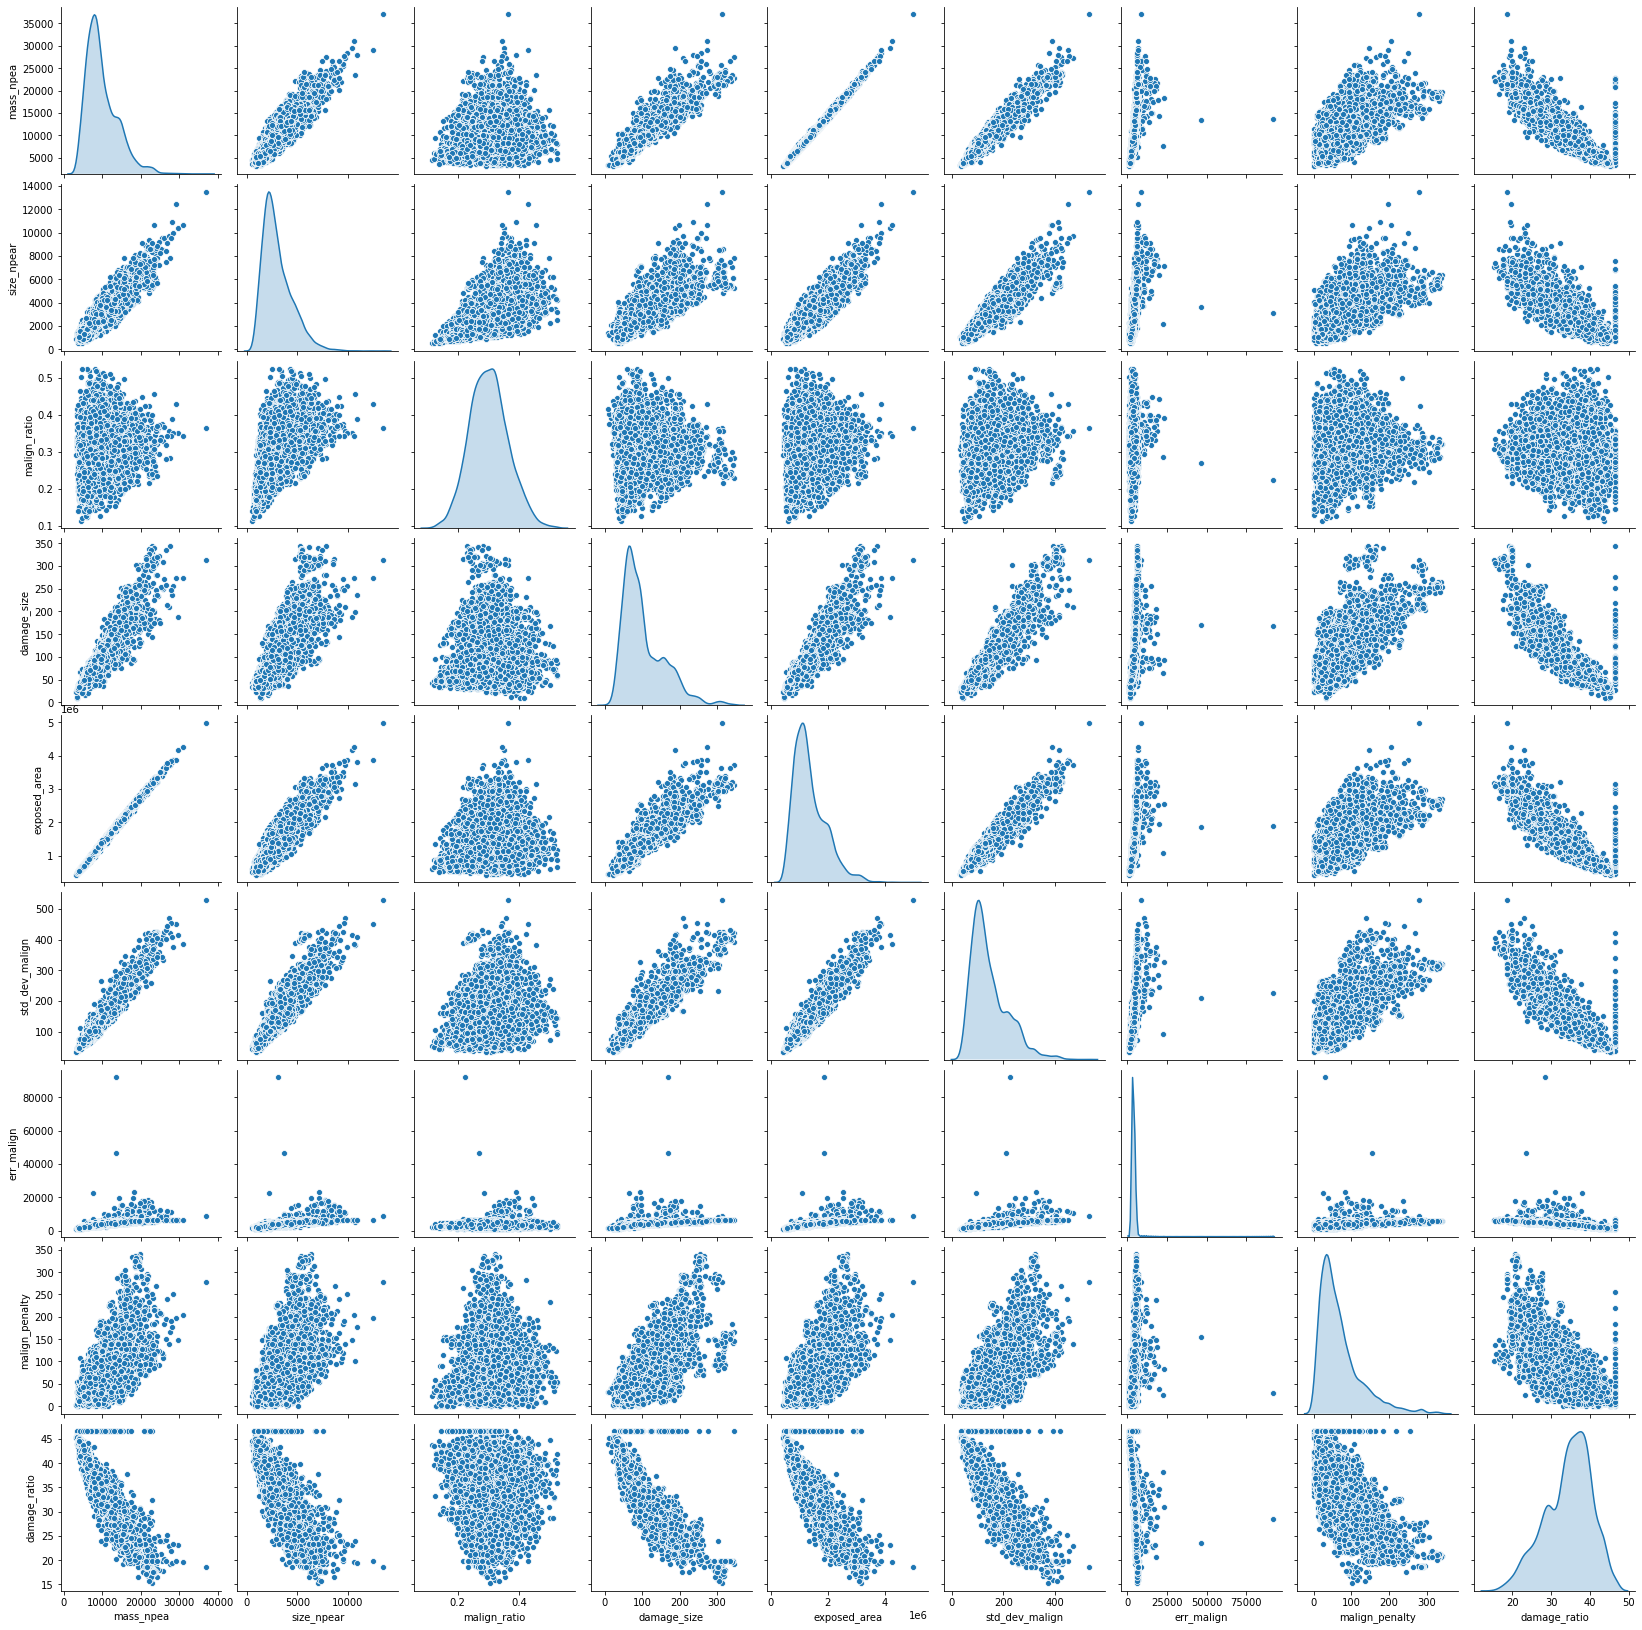

In [18]:
sns.pairplot(X_train[['mass_npea','size_npear','malign_ratio','damage_size','exposed_area','std_dev_malign','err_malign','malign_penalty','damage_ratio']], diag_kind="kde")

<a id=section206></a>
### 2.6 Normalize the Data

- It is good practice to normalize features that use different scales and ranges.

- Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

- **Note**: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset.

In [19]:
# Scaling the values using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x_train = sc.fit_transform(X_train)

In [20]:
scaled_x_train

array([[ 0.67425083,  1.27035496,  1.34121597, ...,  0.38690263,
         0.14924663, -0.51462768],
       [-0.23887222, -0.50893329, -0.74740281, ...,  0.37219962,
        -0.76806432, -0.21791967],
       [-0.09939778,  0.48647062,  1.45545975, ..., -0.18637617,
         0.18521961, -0.05136586],
       ...,
       [ 0.83275683,  0.88811117,  0.37046298, ...,  0.22383494,
         1.60615226, -0.53365665],
       [-0.06006672,  0.00495426,  0.18776867, ...,  0.113615  ,
         0.3650845 , -0.48095844],
       [ 1.40761804,  1.44291705,  0.42263856, ...,  0.77167837,
         2.84722002, -1.2387004 ]])

In [21]:
scaled_x_test = sc.transform(X_test)

In [ ]:
scaled_x_test

array([[-0.03671063,  0.5098335 ,  1.35511256, ...,  0.25836313,
         1.84009143, -0.52703952],
       [-0.0186064 , -0.16090004, -0.30406332, ...,  0.08647267,
        -0.38367723,  0.05417079],
       [ 0.00643884,  0.08852594,  0.2420007 , ...,  0.53056502,
        -0.47192202, -0.55176193],
       ...,
       [ 0.29025294,  0.03173516, -0.41608473, ...,  0.17380061,
        -0.47192202, -0.3335641 ],
       [ 1.18230056,  0.90664508, -0.12037403, ...,  0.61983815,
         2.14012371,  2.03548387],
       [-0.4258112 , -0.19923177,  0.51931018, ..., -0.1213743 ,
        -0.84255013,  0.27879111]])

- This scaled data is what we will use to train the model.

- **Caution**: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier.

<a id=section3></a>
## 3. Model Development

<a id=section301></a>
#### 3.1 Build the Model

- Let's build our model.

- Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value.

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
model = keras.Sequential([layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(1)])

# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compiling the model
model.compile(loss='mae', optimizer=optimizer, metrics=['mae', 'mse'])

<a id=section302></a>
### 3.2 Inspect the Model

- Using the `.summary` method to print a simple description of the model

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


<a id=section303></a>
### 3.3 Train the Model

- Training the model for 1000 epochs, and recording the training and validation accuracy in the `history` object.

- We are using `tfdocs.modeling.EpochDots()` callback to print a "." every epoch, with reports after each 100 epochs.

  - These print settings are the default values, i. e. printing a "." after each epoch and a report after 100 epochs.

  - We can change these as per our requirements in the callback.

In [25]:
# Fitting the ANN to the Training set
model_history = model.fit(scaled_x_train, y_train, epochs=1000, validation_split=0.2, batch_size = 128, verbose=0)

In [26]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


In [27]:
hist = pd.DataFrame(model_history.history)
hist['epoch'] = model_history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.581554,2.581554,15.227180,3.286776,3.286776,20.317377,995
996,2.567656,2.567656,15.050155,3.170878,3.170878,20.414732,996
997,2.572059,2.572059,15.100207,3.399274,3.399274,21.486532,997
998,2.573003,2.573003,15.098875,3.195796,3.195796,20.361588,998
999,2.581750,2.581750,15.140582,3.230888,3.230888,20.324017,999


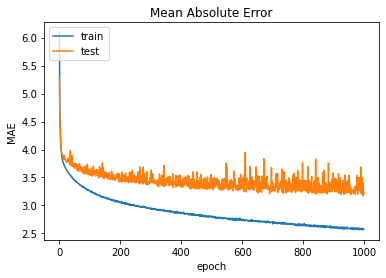

In [28]:
# summarize history for Mean Absolute Error
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<a id=section3041></a>
#### 3.4.1 Early Stopping

In [29]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-wccfbj1w
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-wccfbj1w
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0e06db31756907ce18fe74cde84873100f591cd95_-cp36-none-any.whl size=143891 sha256=0193952a1bc99f60cac46381680bc184e4c54bf373e4eec302e28da5554d5dfa
  Stored in directory: /tmp/pip-ephem-wheel-cache-b252mhqq/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [30]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [31]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [32]:
early_history = model.fit(scaled_x_train, y_train, epochs=1000, validation_split=0.2, batch_size = 128,
                          verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:2.5746,  mae:2.5746,  mse:15.1525,  val_loss:3.2246,  val_mae:3.2246,  val_mse:20.2471,  
...........

In [33]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch
early_hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
6,2.581940,2.581940,15.102237,3.408017,3.408017,23.411283,6
7,2.564739,2.564739,15.096558,3.315059,3.315059,22.223858,7
8,2.578087,2.578087,15.180488,3.297989,3.297989,20.950081,8
9,2.573811,2.573811,15.319195,3.420882,3.420882,21.466602,9
10,2.583139,2.583139,15.106194,3.347840,3.347840,21.477526,10


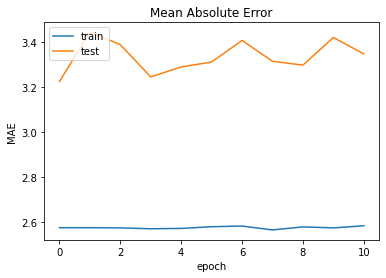

In [35]:
# summarize history for Mean Absolute Error
plt.plot(early_history.history['mae'])
plt.plot(early_history.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
loss, mae, mse = model.evaluate(scaled_x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

57/57 - 0s - loss: 3.2603 - mae: 3.2603 - mse: 21.5743
Testing set Mean Abs Error:  3.26 


<a id=section304></a>
### 3.4 Make Predictions

- Finally, **Tumor Size** values using data in the testing set:

In [37]:
y_pred = model.predict(scaled_x_test).flatten()

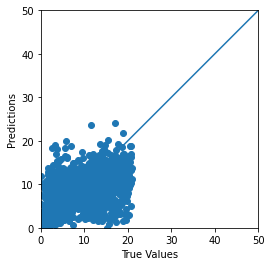

In [38]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

<a id=section4></a>
## 4. Model Tuning

- We have already achieved very good result on our test set.

- If we train the model for too long, the model will start to overfit and learn patterns from the training data that don't generalize to the test data.

  - We need to strike a balance.
  
  - We have already learned how to train for an appropriate number of epochs using the **Early Stopping** callback.

- And, now we will experiment some additional methods to **improve** the model **performance** and reduce overfitting.

  - These methods will all be applied during model building.

<a id=section401></a>
### 4.1 Increasing the Number of Hidden Layers

- We can improve model performance by increasing the number of hidden layers and hidden units in the model.

  - But this can result in overfitting.

- Here, we are increasing the number of **hidden layers** from **2** to **4** i. e. adding 2 additional layers.

- Next, we are using **256 hidden units** instead of 64.

In [40]:
model = keras.Sequential([layers.Dense(256, activation='relu', input_shape=[len(X_train.keys())]),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(1)])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               2560      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 200,193
Trainable params: 200,193
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compiling the model
model.compile(loss='mae', optimizer=optimizer, metrics=['mae', 'mse'])

- We are not using the Early Stopping callback now.

- The model will be trained for **1000 epochs**.

In [47]:
history_large = model.fit(scaled_x_train, y_train, epochs=1000, validation_split=0.2, batch_size = 128,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1.1522,  mae:1.1522,  mse:4.1884,  val_loss:2.9260,  val_mae:2.9260,  val_mse:19.1701,  
....................................................................................................
Epoch: 100, loss:0.6207,  mae:0.6207,  mse:1.1374,  val_loss:2.7828,  val_mae:2.7828,  val_mse:18.0934,  
....................................................................................................
Epoch: 200, loss:0.4882,  mae:0.4882,  mse:0.6447,  val_loss:2.8438,  val_mae:2.8438,  val_mse:19.2306,  
....................................................................................................
Epoch: 300, loss:0.4332,  mae:0.4332,  mse:0.4777,  val_loss:2.7879,  val_mae:2.7879,  val_mse:18.2899,  
....................................................................................................
Epoch: 400, loss:0.3750,  mae:0.3750,  mse:0.3556,  val_loss:2.7171,  val_mae:2.7171,  val_mse:17.3254,  
...................................................................

In [48]:
hist_large = pd.DataFrame(history_large.history)
hist_large['epoch'] = history_large.epoch
hist_large.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.258256,0.258256,0.173554,2.722893,2.722893,18.037600,995
996,0.259295,0.259295,0.167553,2.695170,2.695170,17.981890,996
997,0.259223,0.259223,0.161841,2.661754,2.661754,17.407612,997
998,0.267400,0.267400,0.186005,2.746796,2.746796,18.136335,998
999,0.257188,0.257188,0.165143,2.690907,2.690907,17.607872,999


In [49]:
loss, mae, mse = model.evaluate(scaled_x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

57/57 - 0s - loss: 2.6526 - mae: 2.6526 - mse: 18.0261
Testing set Mean Abs Error:  2.65


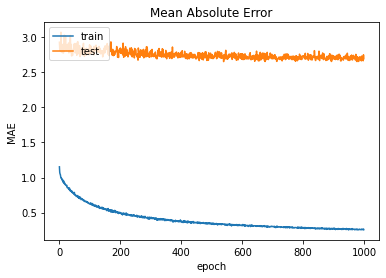

In [50]:
# summarize history for Mean Absolute Error
plt.plot(history_large.history['mae'])
plt.plot(history_large.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<a id=section402></a>
### 4.2 Weight Regularization

- Regularization places **constraints** on the quantity and type of information the model can store.

- If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

In [51]:
from tensorflow.keras import regularizers

In [52]:
model = keras.Sequential([layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=[len(X_train.keys())]),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dense(1)])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               2560      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 200,193
Trainable params: 200,193
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compiling the model
model.compile(loss='mae', optimizer=optimizer, metrics=['mae', 'mse'])

In [56]:
history_l2 = model.fit(scaled_x_train, y_train, epochs=1000, validation_split=0.2, batch_size=128,
                       verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:5.2521,  mae:4.6234,  mse:39.2503,  val_loss:5.3720,  val_mae:4.8408,  val_mse:42.8130,  
....................................................................................................
Epoch: 100, loss:2.4970,  mae:2.2306,  mse:12.4648,  val_loss:3.3654,  val_mae:3.0976,  val_mse:20.5875,  
....................................................................................................
Epoch: 200, loss:2.0577,  mae:1.7280,  mse:8.2237,  val_loss:3.2783,  val_mae:2.9484,  val_mse:20.5471,  
....................................................................................................
Epoch: 300, loss:1.8370,  mae:1.4615,  mse:6.1432,  val_loss:3.2373,  val_mae:2.8619,  val_mse:20.3028,  
....................................................................................................
Epoch: 400, loss:1.6867,  mae:1.2784,  mse:4.9732,  val_loss:3.4651,  val_mae:3.0564,  val_mse:20.7928,  
.................................................................

In [57]:
hist_l2 = pd.DataFrame(history_l2.history)
hist_l2['epoch'] = history_l2.epoch
hist_l2.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.341175,0.868798,2.210666,3.447697,2.974950,21.014494,995
996,1.359405,0.887148,2.346017,3.406905,2.934659,21.103827,996
997,1.332210,0.860058,2.187428,3.411728,2.939700,20.713285,997
998,1.342404,0.870049,2.263014,3.381188,2.908587,20.450726,998
999,1.334539,0.862067,2.292837,3.319353,2.846473,20.226734,999


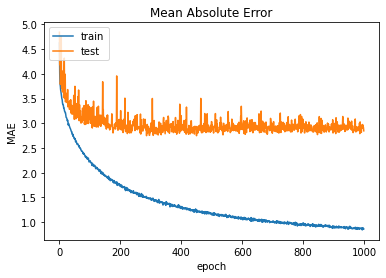

In [58]:
# summarize history for Mean Absolute Error
plt.plot(history_l2.history['mae'])
plt.plot(history_l2.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
loss, mae, mse = model.evaluate(scaled_x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

57/57 - 0s - loss: 3.2126 - mae: 2.7397 - mse: 18.8529
Testing set Mean Abs Error:  2.74


<a id=section403></a>
### 4.3 Dropout

- Dropout is one of the **most effective** and **most commonly used** regularization techniques for neural networks.

- Dropout, applied to a layer, consists of **randomly** "**dropping out**" (i.e. set to zero) a number of **output features** of the layer during training.

In [60]:
model = keras.Sequential([layers.Dense(256, activation='relu', input_shape=[len(X_train.keys())]),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(1)])

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)              

In [62]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compiling the model
model.compile(loss='mae', optimizer=optimizer, metrics=['mae', 'mse'])

In [63]:
history_dropout = model.fit(scaled_x_train, y_train, epochs=1000, validation_split=0.2, batch_size=128,
                            verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:4.7002,  mae:4.7002,  mse:40.6174,  val_loss:4.2460,  val_mae:4.2460,  val_mse:31.3867,  
....................................................................................................
Epoch: 100, loss:2.5141,  mae:2.5141,  mse:14.9995,  val_loss:2.9159,  val_mae:2.9159,  val_mse:19.5265,  
....................................................................................................
Epoch: 200, loss:2.1134,  mae:2.1134,  mse:11.2921,  val_loss:2.8630,  val_mae:2.8630,  val_mse:20.9276,  
....................................................................................................
Epoch: 300, loss:1.8759,  mae:1.8759,  mse:9.2234,  val_loss:2.7366,  val_mae:2.7366,  val_mse:18.7730,  
....................................................................................................
Epoch: 400, loss:1.7199,  mae:1.7199,  mse:7.8358,  val_loss:2.7875,  val_mae:2.7875,  val_mse:19.8498,  
................................................................

In [64]:
hist_dropout = pd.DataFrame(history_dropout.history)
hist_dropout['epoch'] = history_dropout.epoch
hist_dropout.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.376279,1.376279,5.090002,2.619849,2.619849,18.432989,995
996,1.326967,1.326967,4.872007,2.648618,2.648618,18.546396,996
997,1.315641,1.315641,4.671432,2.671126,2.671126,18.926197,997
998,1.323274,1.323274,4.892140,2.649029,2.649029,18.222097,998
999,1.331322,1.331322,4.887292,2.753469,2.753469,19.791096,999


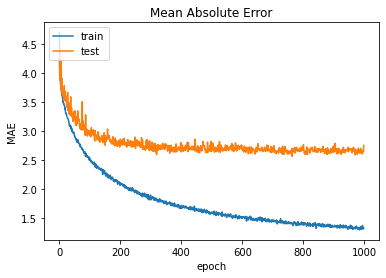

In [65]:
# summarize history for Mean Absolute Error
plt.plot(history_dropout.history['mae'])
plt.plot(history_dropout.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
loss, mae, mse = model.evaluate(scaled_x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

57/57 - 0s - loss: 2.5610 - mae: 2.5610 - mse: 18.0153
Testing set Mean Abs Error:  2.56


<a id=section404></a>
### 4.4 Combined L2 + Dropout

- We can also combine both L2 regularization and Dropout in a single model.

In [68]:
from tensorflow.keras import regularizers

In [69]:
model = keras.Sequential([layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=[len(X_train.keys())]),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dropout(0.2),
                          layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
                          layers.Dropout(0.2),
                          layers.Dense(1)])

In [70]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)              

In [71]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compiling the model
model.compile(loss='mae', optimizer=optimizer, metrics=['mae', 'mse'])

In [73]:
history_l2_dropout = model.fit(scaled_x_train, y_train, epochs=1000, validation_split=0.2, batch_size=128,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:5.4138,  mae:4.7288,  mse:41.5380,  val_loss:4.8224,  val_mae:4.2143,  val_mse:30.5919,  
....................................................................................................
Epoch: 100, loss:3.0164,  mae:2.8079,  mse:17.4963,  val_loss:3.2997,  val_mae:3.0915,  val_mse:20.1720,  
....................................................................................................
Epoch: 200, loss:2.7622,  mae:2.5146,  mse:14.7613,  val_loss:3.2445,  val_mae:2.9963,  val_mse:19.6005,  
....................................................................................................
Epoch: 300, loss:2.6427,  mae:2.3689,  mse:13.4445,  val_loss:3.1919,  val_mae:2.9169,  val_mse:18.6804,  
....................................................................................................
Epoch: 400, loss:2.5794,  mae:2.2899,  mse:12.5439,  val_loss:3.0472,  val_mae:2.7582,  val_mse:17.5753,  
..............................................................

In [74]:
hist_l2_dropout = pd.DataFrame(history_l2_dropout.history)
hist_l2_dropout['epoch'] = history_l2_dropout.epoch
hist_l2_dropout.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.335629,2.004987,9.928855,3.115793,2.785177,18.403528,995
996,2.366891,2.036602,10.283209,3.054364,2.724201,17.336313,996
997,2.338105,2.008068,9.910125,3.029525,2.700062,17.457411,997
998,2.333201,2.002975,9.798683,3.004683,2.675146,16.802437,998
999,2.343458,2.013379,10.045297,3.105872,2.776084,18.208866,999


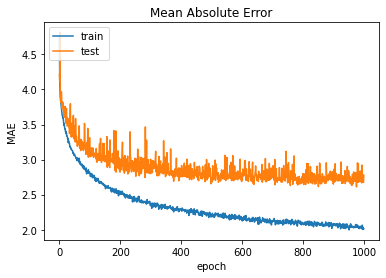

In [75]:
# summarize history for Mean Absolute Error
plt.plot(history_l2_dropout.history['mae'])
plt.plot(history_l2_dropout.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [76]:
loss, mae, mse = model.evaluate(scaled_x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

57/57 - 0s - loss: 3.1004 - mae: 2.7706 - mse: 18.5155
Testing set Mean Abs Error:  2.77


<a id=section405></a>
### 4.5 Batch Normalization

- Batch normalization is a technique for training very deep neural networks.

    - It **normalizes** the **activations** of the previous layer at each batch.

    - It applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

In [77]:
model = keras.Sequential([layers.Dense(256, input_shape=[len(X_train.keys())]),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(256),
                          layers.BatchNormalization(),
                          layers.ReLU(),
                          layers.Dense(1)])

In [78]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               2560      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)              

In [79]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compiling the model
model.compile(loss='mae', optimizer=optimizer, metrics=['mae', 'mse'])

In [81]:
history_batch_norm = model.fit(scaled_x_train, y_train, epochs=1000, validation_split=0.2, batch_size=128,
                               verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1.9058,  mae:1.9058,  mse:9.1436,  val_loss:3.1655,  val_mae:3.1655,  val_mse:21.0286,  
....................................................................................................
Epoch: 100, loss:1.4893,  mae:1.4893,  mse:5.5541,  val_loss:3.0239,  val_mae:3.0239,  val_mse:19.8932,  
....................................................................................................
Epoch: 200, loss:1.2499,  mae:1.2499,  mse:3.9215,  val_loss:2.8253,  val_mae:2.8253,  val_mse:18.2144,  
....................................................................................................
Epoch: 300, loss:1.0714,  mae:1.0714,  mse:2.8947,  val_loss:2.7885,  val_mae:2.7885,  val_mse:18.3788,  
....................................................................................................
Epoch: 400, loss:0.9829,  mae:0.9829,  mse:2.4093,  val_loss:2.8174,  val_mae:2.8174,  val_mse:17.8093,  
...................................................................

In [82]:
hist_batch_norm = pd.DataFrame(history_batch_norm.history)
hist_batch_norm['epoch'] = history_batch_norm.epoch
hist_batch_norm.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.742916,0.742916,1.460909,2.838764,2.838764,18.613319,995
996,0.769787,0.769787,1.559707,2.762503,2.762503,18.011473,996
997,0.701145,0.701145,1.265517,2.762145,2.762145,18.039492,997
998,0.693564,0.693564,1.263626,2.798213,2.798213,18.578335,998
999,0.703022,0.703022,1.237229,2.775025,2.775025,18.510799,999


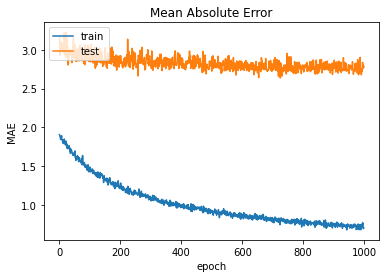

In [83]:
# summarize history for Mean Absolute Error
plt.plot(history_batch_norm.history['mae'])
plt.plot(history_batch_norm.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
loss, mae, mse = model.evaluate(scaled_x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

57/57 - 0s - loss: 2.6111 - mae: 2.6111 - mse: 17.1979
Testing set Mean Abs Error:  2.61


<a id=section5></a>
## 5. Conclusion

Finally, we have built a Deep learning model that will predict the size of the Melanoma Tumor based on the input parameters.

- **Mean Absolute Error** (MAE) is a common loss function used for regression problems.

- When numeric input data features have values with different ranges, each **feature** should be **scaled** independently to the same range.

- **Early stopping** is a useful technique to prevent overfitting.

- We can improve the performance of a model by increasing the number of hidden layers and the hidden units in the model.

- Regularization Techniques to reduce overfitting are:

  - **Weight Regularization**, **Dropout**, **Batch Normalization**

**Results**
--

- We have built 6 versions of the models using various model Tuning techniques and dervied at the results.

- Let's compare the results of the various versions chose the best model for building our production pipeline.

  - Two layer neural network - 3.26 (Test error)
  - Two layer neural network with early stopping - 3.26 (Test error)
  - Four layer neural network - 2.65 (Test error)
  - Four layer neural network with regularization - 2.74 (Test error)
  - Four layer neural network with dropout - 2.56 (Test error)
  - Four layer neural network with regularization + dropout - 2.77 (Test error)
  - Four layer neural network with Batch normalization - 2.61 (Test error)

Based on our results we can see that Four layer neural network is best fit for our data, and specifically Four layer neural network with dropout & batch normalization model gives the least test error.

But for our genralization in developing a simpler model, we can select the **Four layer neural network with Batch normalization model** for building our production pipeline.

Hence, we have developed the deep sequential neural network model for our problem that will predict the output for the new in coming values.